<center>
<h1>Deep Learning with Python - Francois Chollet</h1>
<h2> Chapter 04 - Multiclass Classifier</h2>
</center>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import KFold

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1
    
    return results

In [3]:
def model_evaluation(history, axes):
    
    training_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    epochs = range(1, len(training_loss) + 1)

    axes[0].plot(epochs, training_loss, "bo", label="Training Loss")
    axes[0].plot(epochs, validation_loss, "b", label="Validation Loss")
    axes[0].set_title("Training and validation loss")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    training_acc = history.history["accuracy"]
    validation_acc = history.history["val_accuracy"]
    axes[1].plot(epochs, training_acc, "bo", label="Training Accuracy")
    axes[1].plot(epochs, validation_acc, "b", label="Validation Accuracy")
    axes[1].set_title("Training and validation accuracy")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy")
    
    plt.show()

## <center>Summary</center>

***What is an ``epoch``?***

- An epoch is the number of times the algorithm will iterate over the whole training dataset.

***What is one-hot encoding?***

- One-hot encoding is a form of encode categorical integer features using a one-hot aka one-of-K scheme. This creates a binary column for each category and returns a sparse matrix. An example:

| A |
|---|
| 1 |
| 2 |
| 3 |

The above feature turns into:

| A | A | A |
|---|---|---|
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

***What is the learning rate and how it works?***

- The learning rate is a hyperparameter used to govern the pace at which an algorithm updates or learns the values of its weights. In other words, the learning rate regulates how the weights of our neural network are updated based on the loss function gradient.  The learning rate would be a scalar factor modulating the “speed” of the gradient descent process. The weight update given by the learning rate $\eta$ is: $$\Delta w_j = \eta (y - \hat{y}) x_j$$

***What is the difference between an Embedding Layer and Dense Layer?***

- An Embedding Layer is a form of “skipping” the one-hot encoding process in categorical features. It allows saving computing power and time that would be used multiplying matrices that are mostly zero's with Dense Layers. For a complete overview, check [here](https://medium.com/logivan/neural-network-embedding-and-dense-layers-whats-the-difference-fa177c6d0304#:~:text=While%20a%20Dense%20layer%20considers,weights%20in%20the%20lookup%20table.)

***What is the ReLu activation function?***

- The *rectified linear activation unit*, is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It was largely adopted because it helped to solve the problem of the “vanishing gradient”. $$f(x) = max(0, x)$$

***What is the Sigmoid activation function?***

- This function takes any real value as input and outputs values in the range of 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0. $$f(x) = \frac{1}{1+ e^{-x}}$$
  - It is commonly used for models where we have to predict the probability as an output in ***binary*** classification problems. Check reference [1](https://stats.stackexchange.com/questions/576350/neural-networks-what-is-the-point-of-having-sigmoid-activation-function-sigm).
  - One of the limitations of the sigmoid/logistic function it's its gradient $\big[f'(x) = \frac{1}{1+ e^{-x}} \times \big (1 - \frac{1}{1+ e^{-x}} \big) \big]$ for extreme values. For values of $x$ outside the range $[-3, 3]$ the derivative of the function gets pretty flat, which implies a decrease in the network learning.

***What is Cross-Entropy Loss?***

- ***Entropy*** of a random variable X is the level of uncertainty inherent in the variable's possible outcome. The greater the value of entropy, the greater the uncertainty for the probability distribution and the smaller the value, the less the uncertainty.
- The definition above — which I got [here](https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e)— makes clear that this loss function uses the uncertainty of the output of the network to update its weights. This function it's used in classification problems and its mathematical definition is below, where $y_i$ is the truth label, $\hat{y}_i$ is the output of the network, and $C$ is the number of classe we have. $$CE = - \sum_i^C y_i log(\hat{y}_i)$$

***How the ``RMSProp`` optimizer works?***

- [Keras documentation](https://keras.io/api/optimizers/rmsprop/).
- The objective of the ``RMSProp`` is to create an adaptive learning rate that is updated using the moving average of the recent gradients. This is the mini-batch version of just using the sign of the gradient to update weights.

***What is the Softmax activation function?***

- Similarly to the sigmoid function, the Softmax is used to scale numbers into probabilities. The difference between both functions is that Softmax outputs vectors and the probability of each class inside the vector. It addresses the problem of ***multi-class*** classification and the probabilities inside the output vector sums to one (what wouldn't be the case with broadcasting of the sigmoid function through the vector). The mathematical definition is: $$softmax(x) = \frac{e^{x_i}}{\sum_j^C e^{x_j}}$$
- References [1](https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78) [2](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

***Supervised Learning terminology***

- *Binary classification*: a classification task where each input sample should be categorized into two exclusive categories.
- *Multiclass classification*: A classification task where each input sample should be categorized into more than two categories: for instance, classifying handwritten digits.
- *Multilabel classification*: a classification task where each input sample can be assigned multiple labels. For instance, a given image may contain both a cat and a dog and should be annotated both with the “cat” label and the “dog” label. The number of labels per image is usually variable.
- *Scalar regression*: a task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.
- *Vector regression*: a task where the target is a set of continuous values. For example, a continuous vector. If you’re doing regression against multiple values (such as the coordinates of a bounding box in an image), then you’re doing vector regression.

***Spliting dataset in training/validation/test***

- There are two main splits: (i) training; (ii) test. We use the training split to teach our algorithm how to solve the problem, and use part of the training set to calculate estimates of our test set metrics. This is known as cross-validation. We use the test set to assess how well our model can generalize for new data.

***What is K-fold?***

- K-fold cross validation is the procedure of splitting the training set in $k$ parts and use $k - 1$ parts to train the model. After that, we use the part that wasn't involved in training to calculate performance metrics for the model. The process is repeated in each epoch of our training loop, and the performance metrics calculated serve as an estimate of the model's performance in the test set.

***What is the difference between the MSE (mean squared error) and the variance?***

- In pratical terms, little to none. But mathematically they differ in meaning. See [here](https://math.stackexchange.com/questions/1357738/what-is-the-difference-between-variance-and-mse#:~:text=The%20variance%20measures%20how%20far,estimator%20and%20what%20is%20estimated.). To a quick recap, take the biased estimated average of a parameter $E[\hat{\theta}] = \theta + \tilde{\beta}$. The variance of a sample is the mean of the quadratic difference between the parameter estimation and its mean, that is, $Var(\hat{\theta}) = E[(\hat{\theta} - E[\hat{\theta}])^2]$. The mean squared error is the mean of the quadratic difference between the true parameter and its estimator, that is, $MSE(\hat{\theta}) = E[(\hat{\theta} - \theta)^2]$. Doing the right substitutions and working on the algebra of it, you can see that when $\tilde{\beta} = 0$, the variance and the mean squared error are equal.

***


## <center>Binary Classification</center>

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
decode_review = " ".join([reverse_word_index.get(i - 3, "?") for i in [8, 5, 9]])
decode_review

'to and is'

In [6]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

X_val = X_train[:10000]
X_partial_train = X_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]

### First Model Architecture

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5167 - accuracy: 0.7797 - val_loss: 0.3874 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3146 - accuracy: 0.8985 - val_loss: 0.3342 - val_accuracy: 0.8677
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2397 - accuracy: 0.9161 - val_loss: 0.2901 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1894 - accuracy: 0.9362 - val_loss: 0.2747 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1621 - accuracy: 0.9459 - val_loss: 0.3061 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1338 - accuracy: 0.9568 - val_loss: 0.3391 - val_accuracy: 0.8709
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1159 - accuracy: 0.9638 - val_loss: 0.3808 - val_accuracy: 0.8582
Epoch 8/20
30

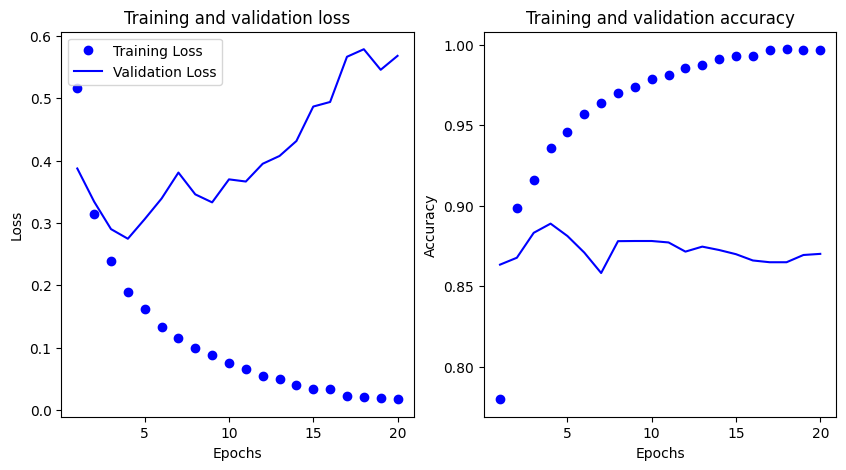

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_partial_train,
                    y_partial_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val), 
                    verbose=False)

model_evaluation(history, axes)

### Model tweaks for testing

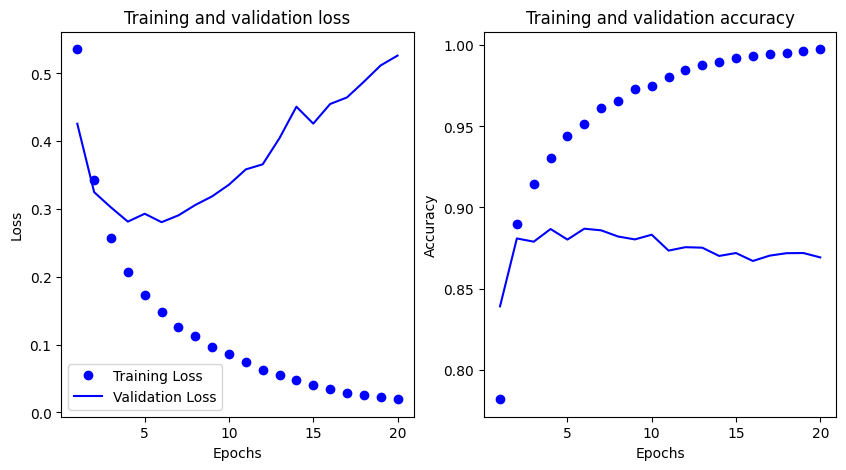

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

model2 = keras.Sequential(
    [   
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model2.fit(X_partial_train,
                    y_partial_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=False)

model_evaluation(history, axes)

### Final Model

In [9]:
model = keras.Sequential(
    [   
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    verbose=False)

results = model.evaluate(X_test, y_test, verbose=False)

print(f"Test loss: {results[0]}\nTest accuracy: {results[1]}")

Test loss: 0.28623583912849426
Test accuracy: 0.8866400122642517


## <center>Multiclass Classification</center>

In [10]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [19]:
X_train = vectorize_sequences(train_data)
X_test  = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test =  to_categorical(test_labels)

X_val = X_train[:1000]
X_partial_train = X_train[1000:]

y_val = y_train[:1000]
y_partial_train = y_train[1000:]

In [20]:
print(X_train.shape)
print(y_train.shape)

print(X_train[0].shape)
print(y_train[0].shape)

print(X_train[0][0])
print(y_train[0][0])


(8982, 10000)
(8982, 46)
(10000,)
(46,)
0.0
0.0


### First Model

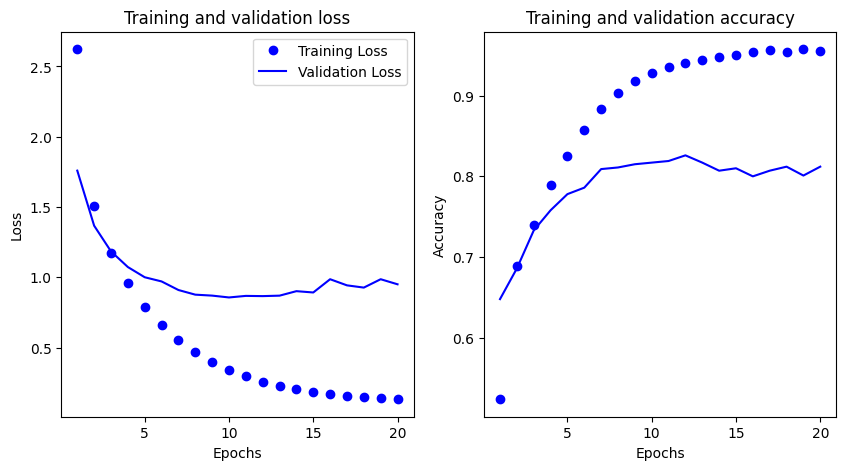

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"], run_eagerly=True)


history = model.fit(
    X_partial_train,
    y_partial_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val),
    verbose=False,
)

model_evaluation(history, axes)

### Final Model

Important to note that the point where validation loss and accuracy stops decreasing/increasing it's the point we start to have overfitting. The author solves this problem decreasing the number of epochs to that specific point. 

In [22]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"], run_eagerly=True)


history = model.fit(
    X_train,
    y_train,
    epochs=9,
    batch_size=512,
    verbose=False,
)

results = model.evaluate(X_test, y_test, verbose=False)

print(f"Test loss: {results[0]}\nTest accuracy: {results[1]}")

Test loss: 0.9144973158836365
Test accuracy: 0.7951914668083191


## <center>Regression</center>

In [4]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


### Pre-processing

In [5]:
def regression_pre_processing(X):
    
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    return X


train_data = regression_pre_processing(train_data)
test_data = regression_pre_processing(test_data)

# mean = np.mean(train_data, axis=0)
# std = np.std(train_data, axis=0)
# test_data = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)
# test_data = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)

# Chollet usou train_data pra fazer o pre-processamento da test_data
# O raciocíno é: não há diferença significantemente estatística entre os valores, 
# então normalizar de um jeito ou de outro não impactaria. Isso não configura data leakeage 
# porque não estamos utilizando isso para ajustar os pesos

### K-fold validation

In [6]:
def build_model():
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

    return model

In [7]:
kfolds = KFold(n_splits=4, shuffle=True).split(train_data, train_targets)
histories = []

for fold, (train, test) in enumerate(kfolds):
    
    print(f"Processing fold #{fold}")
    
    model = build_model()

    history = model.fit(
        train_data[train],
        train_targets[train],
        epochs=130,
        batch_size=16,
        validation_data=(train_data[test], train_targets[test]),
        verbose=False,
    )

    histories.append(history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [9]:
mean_training_loss = np.mean([h.history["loss"] for h in histories], axis=0)
mean_training_mae = np.mean([h.history["mae"] for h in histories], axis=0)

mean_validation_loss = np.mean([h.history["val_loss"] for h in histories], axis=0)
mean_validation_mae = np.mean([h.history["val_mae"] for h in histories], axis=0)

epochs = range(1, len(history.epoch) + 1)

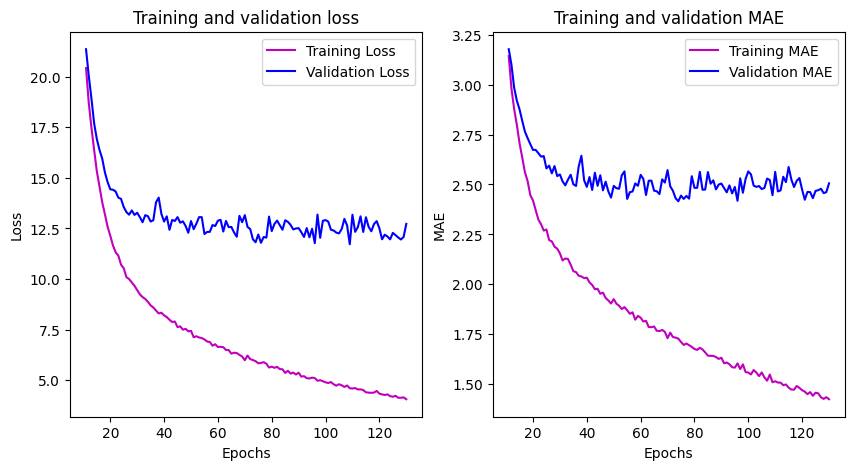

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(epochs[10:], mean_training_loss[10:], "m", label="Training Loss")
axes[0].plot(epochs[10:], mean_validation_loss[10:], "b", label="Validation Loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(epochs[10:], mean_training_mae[10:], "m", label="Training MAE")
axes[1].plot(epochs[10:], mean_validation_mae[10:], "b", label="Validation MAE")
axes[1].set_title("Training and validation MAE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

plt.show()

In [16]:
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=130,
    batch_size=16,
    verbose=False,
)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.4602 - mae: 2.7346


In [19]:
print(test_mae_score)
print(test_mse_score)

2.734560489654541
15.460192680358887
